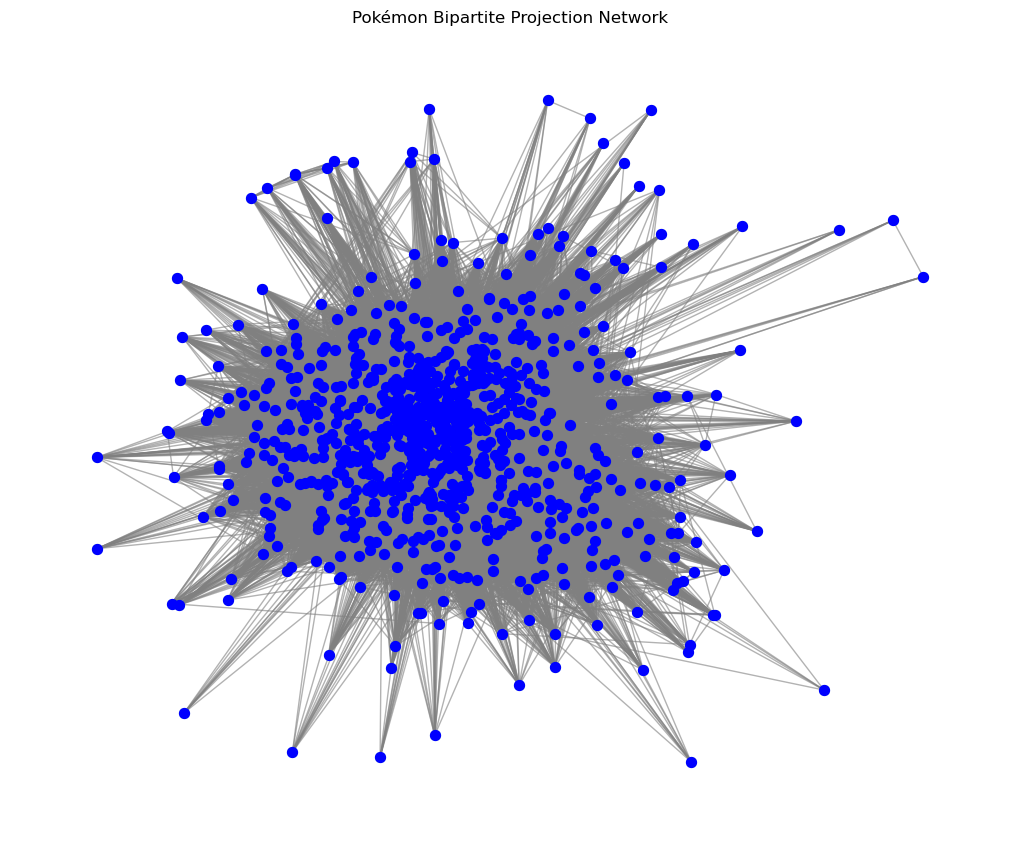

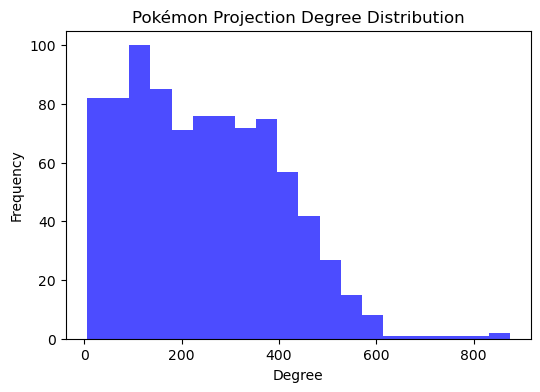

Bipartite projection completed and data exported.


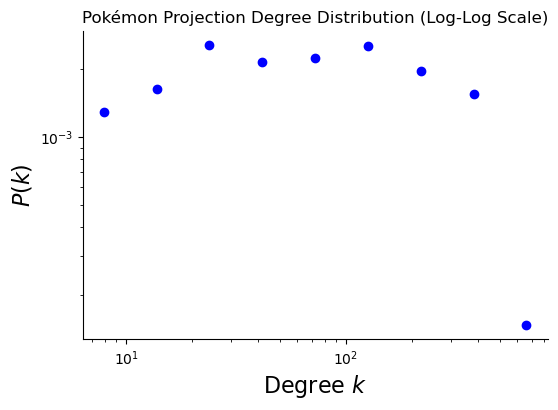

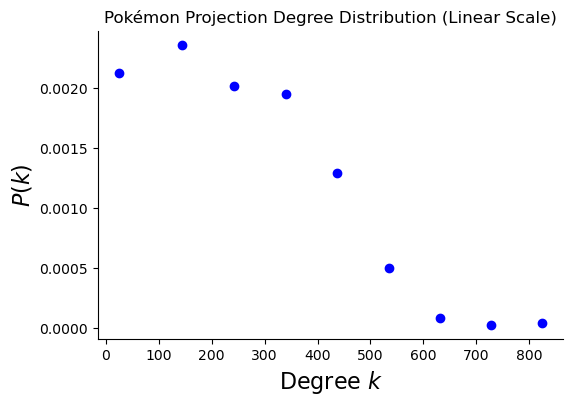

In [9]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load nodes
pokemon = pd.read_csv('../../datasets/clean/pokemon_nodes.csv')
episodes = pd.read_csv('../../datasets/clean/episode_nodes.csv')

pokemon_ids = set(pokemon['Id'])
episode_ids = set(episodes['Id'])

# Load bipartite graph
G = nx.Graph()
G.add_nodes_from(pokemon_ids, bipartite=0)
G.add_nodes_from(episode_ids, bipartite=1)
G_temp = nx.read_edgelist('../../datasets/clean/edge_list.csv', delimiter=",", nodetype=int, encoding='utf-8', comments="Source")
G.add_edges_from(G_temp.edges())


# Project Pokémon nodes onto a new weighted graph
pokemon_projection = nx.Graph()

for episode in episode_ids:
    neighbors = list(G.neighbors(episode))  # Pokémon appearing in this episode
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if pokemon_projection.has_edge(neighbors[i], neighbors[j]):
                pokemon_projection[neighbors[i]][neighbors[j]]['weight'] += 1
            else:
                pokemon_projection.add_edge(neighbors[i], neighbors[j], weight=1)

# Export the projected graph
edges_data = [(u, v, d['weight']) for u, v, d in pokemon_projection.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Pokemon1', 'Pokemon2', 'Weight'])
edges_df.to_csv('../../datasets/clean/pokemon_projection_edges.csv', index=False)

# Visualizing the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(pokemon_projection, seed=42)
nx.draw(pokemon_projection, pos, node_size=50, edge_color='gray', alpha=0.6)
nx.draw_networkx_nodes(pokemon_projection, pos, node_size=50, node_color='blue')
plt.title("Pokémon Bipartite Projection Network")
plt.show()

# Degree distribution
degrees = np.array([d for n, d in pokemon_projection.degree()])
plt.figure(figsize=(6,4))
plt.hist(degrees, bins=20, color='blue', alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Pokémon Projection Degree Distribution")
plt.show()

# Compute clustering coefficient
clustering = nx.clustering(pokemon_projection)
clustering_df = pd.DataFrame(list(clustering.items()), columns=['Pokemon', 'Clustering'])
clustering_df.to_csv('../../datasets/clean/pokemon_clustering.csv', index=False)

# Compute closeness centrality
closeness = nx.closeness_centrality(pokemon_projection)
closeness_df = pd.DataFrame(list(closeness.items()), columns=['Pokemon', 'Closeness'])
closeness_df.to_csv('../../datasets/clean/pokemon_closeness.csv', index=False)

# Compute betweenness centrality
betweenness = nx.betweenness_centrality(pokemon_projection)
betweenness_df = pd.DataFrame(list(betweenness.items()), columns=['Pokemon', 'Betweenness'])
betweenness_df.to_csv('../../datasets/clean/pokemon_betweenness.csv', index=False)

print("Bipartite projection completed and data exported.")

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def plot_degree_distribution(degrees, title, color):
    if len(degrees) == 0:
        print(f"No nodes with nonzero degree for {title}. Skipping plot.")
        return

    kmin, kmax = degrees.min(), degrees.max()
    kmin = max(kmin, 1)  # Ensure kmin is at least 1 to avoid log(0)

    # Log-log plot
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.loglog(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Log-Log Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

    # Linear plot
    bin_edges = np.linspace(kmin, kmax, num=10)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.plot(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Linear Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()






# Compute degrees for the Pokémon projection (excluding zero-degree nodes for log-log)
pokemon_projection_degrees = np.array([d for n, d in pokemon_projection.degree()])
pokemon_projection_degrees_nonzero = pokemon_projection_degrees[pokemon_projection_degrees > 0]

# Plot degree distribution for the Pokémon projection
plot_degree_distribution(pokemon_projection_degrees_nonzero, "Pokémon Projection", "blue")
